In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
%sx dir Data_Science\Data\MNIST-data\

[' Le volume dans le lecteur C n’a pas de nom.',
 ' Le numéro de série du volume est 28EC-64C2',
 '',
 ' Répertoire de C:\\Users\\DJEBALI\\Documents\\Data_Science\\Data\\MNIST-data',
 '',
 '01/11/2018  13:31    <DIR>          .',
 '01/11/2018  13:31    <DIR>          ..',
 '01/11/2018  13:31         1\xa0648\xa0877 t10k-images-idx3-ubyte.gz',
 '01/11/2018  13:31             4\xa0542 t10k-labels-idx1-ubyte.gz',
 '01/11/2018  13:31         9\xa0912\xa0422 train-images-idx3-ubyte.gz',
 '01/11/2018  13:31            28\xa0881 train-labels-idx1-ubyte.gz',
 '               4 fichier(s)       11\xa0594\xa0722 octets',
 '               2 Rép(s)  66\xa0904\xa0903\xa0680 octets libres']

In [3]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [4]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [5]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

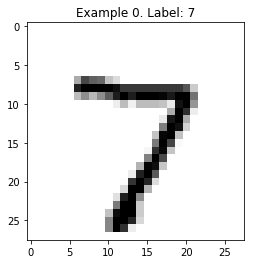

In [6]:
display(0)

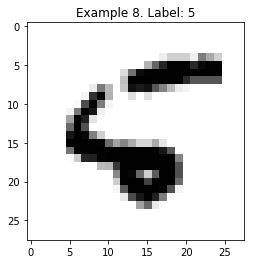

In [7]:
display(8)

In [8]:
print(len(data[0]))

784


In [9]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001E8A5B6A320>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [10]:
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


Predicted 5, Label: 5


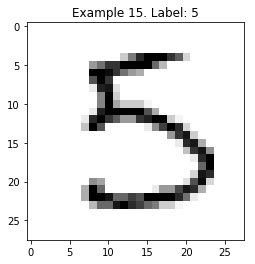

In [11]:
# here's one it gets right
print("Predicted %d, Label: %d" %(classifier.predict(np.array([test_data[15]], dtype=float), as_iterable=False), test_labels[15]))
display(15)

Predicted 7, Label: 7


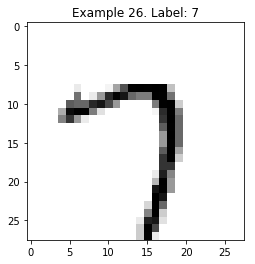

In [12]:
# and one it gets wrong
print("Predicted %d, Label: %d" % 
      (classifier.predict(np.array([test_data[26]], dtype=float), as_iterable=False), test_labels[26]))
display(26)

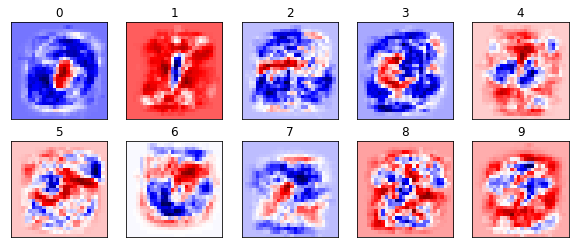

In [13]:
weights = classifier.get_variable_value(classifier.get_variable_names()[3])
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()